# Workspace \#4: ``ska.py``

In [2]:
# getting future division
from __future__ import division

# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
# %matplotlib inline
%matplotlib notebook

%config InlineBackend.figure_format = "retina"
# rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# current directory
current_dir = os.getcwd()

In [3]:
from random import random

import sys
sys.path.insert(0, '../')

import tools as tl
import constants as ct
import particle as pt
import ska as sk

In [3]:
# The contents of astro.py
dir(sk)

['SKA_conf',
 'SKA_exper_nu',
 'SKA_get_active_baseline',
 'SKA_specs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ct',
 'division',
 'eta_low_fn',
 'eta_mid_fn',
 'eta_nu',
 'exp',
 'get_baseline',
 'get_telescope_coordinate',
 'initialize',
 'local_path',
 'log',
 'log10',
 'np',
 'nu_eta_low',
 'nu_eta_mid',
 'os',
 'pi',
 'power',
 'pt',
 'sqrt',
 'tl']

In [11]:
help(sk.SKA_exper_nu)

Help on function SKA_exper_nu in module ska:

SKA_exper_nu(nu)
    Returns the SKA experiment mode (low/mid) sensitive to the given frequency nu [GHz].
    
    Parameters
    ----------
    nu : frequency [GHz]



In [12]:
print(sk.SKA_exper_nu(ct._nu_min_ska_low_*0.9))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_low_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_low_*0.9)))
print('%s %s' %(sk.SKA_exper_nu(ct._nu_min_ska_mid_*1.1), sk.SKA_exper_nu(ct._nu_max_ska_mid_*0.9)))
print(sk.SKA_exper_nu(ct._nu_max_ska_mid_*1.1))

None
SKA low SKA low
SKA mid SKA mid
None


In [13]:
help(sk.SKA_specs)

Help on function SKA_specs in module ska:

SKA_specs(nu, exper_mode, correlation_mode=None, theta_sig=None)
    Returns the SKA specifications for the given experiment mode and frequency [GHz]:
    
    area [m^2],
    window,
    receiver noise brightness temperature [K],
    efficiency,
    solid angle resolution [sr],
    number_of_dishes, and
    number_of_measurements.
    
    Parameters
    ----------
    nu : frequency [GHz]
    exper_mode : mode in which the experiment is working
    correlation_mode: whether to run in interferometry mode or single dish mode. Default None is meant to raise error if not assigned explicitly.
    theta_sig: the signal size we want to observe [radian]



In [14]:
# area, window, receiver noise temp, efficiency, Omega res, num. dishes, num. mesur

print(sk.SKA_specs(ct._nu_min_ska_low_*1.1, 'SKA low', correlation_mode="single dish")) # within SKA low detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA mid', correlation_mode="single dish")) # within SKA mid detection region
print(sk.SKA_specs(ct._nu_min_ska_mid_*1.1, 'SKA low', correlation_mode="single dish")) # outside SKA low detection region

(580667.0, 1.0, 40.0, 0.5165064222062037, 0.02403705596310762, 512.0001293093718, 512.0001293093718)
(32663.9, 1.0, 20.0, 0.34361665603064734, 0.003357063713178731, 196.99124608352318, 196.99124608352318)
(580667.0, 0.0, 40.0, 0.04480800170918526, 0.0004908588680494537, 512.0001293093718, 512.0001293093718)


In [15]:
Nma = 101
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

In [16]:
sk.SKA_specs(nulow, 'SKA low', correlation_mode="single dish")[3]

array([0.38186819, 0.44362094, 0.49714348, 0.54283606, 0.58118595,
       0.61262036, 0.63701804, 0.65527503, 0.66732252, 0.67143957,
       0.66965603, 0.6661982 , 0.66477741, 0.67215904, 0.67273574,
       0.65982074, 0.6263688 , 0.58552605, 0.54071559, 0.49553014,
       0.45387034, 0.41954541, 0.38892525, 0.3597638 , 0.33499908,
       0.31819575, 0.30352737, 0.28697098, 0.26948587, 0.25104343,
       0.23155659, 0.21291019, 0.19683787, 0.18098272, 0.16736652,
       0.15631659, 0.14470344, 0.13580855, 0.12340096, 0.11244574,
       0.10665062, 0.1019494 , 0.09503882, 0.08839776, 0.08313052,
       0.07641213, 0.07177777, 0.06860391, 0.06034605, 0.05330196])

In [17]:
sk.SKA_specs(numid, 'SKA mid', correlation_mode="single dish")[3]

array([0.33374131, 0.3415595 , 0.34979442, 0.35899462, 0.36897878,
       0.37782012, 0.37912236, 0.55497516, 0.55698105, 0.56728553,
       0.57509895, 0.58030562, 0.58076925, 0.62319134, 0.78418462,
       0.79267983, 0.80295131, 0.81162181, 0.8211165 , 0.82844625,
       0.83485048, 0.83585071, 0.83792187, 0.83911926, 0.84029674,
       0.84070675, 0.84040815, 0.8411944 , 0.842607  , 0.62670338,
       0.63883445, 0.6384672 , 0.63881787, 0.63836087, 0.63427818,
       0.6242134 , 0.61304556, 0.60110788, 0.58829204, 0.57604195,
       0.56221034, 0.54906615, 0.53454674, 0.52042936, 0.50620294,
       0.49115371, 0.47534607, 0.46088967, 0.44559581, 0.43037678,
       0.41608681])

In [18]:
sk.SKA_specs(nulow, 'SKA low', correlation_mode="single dish")[4]

array([0.02908094, 0.02686212, 0.02481248, 0.02291913, 0.02117018,
       0.01955462, 0.01806229, 0.0166838 , 0.01541047, 0.01423428,
       0.01314784, 0.01214429, 0.01121731, 0.01036108, 0.00957018,
       0.00883965, 0.00816486, 0.00754158, 0.00696587, 0.00643409,
       0.00594291, 0.00548922, 0.00507016, 0.00468309, 0.00432556,
       0.00399533, 0.00369031, 0.00340857, 0.00314834, 0.00290797,
       0.00268596, 0.00248089, 0.00229148, 0.00211653, 0.00195493,
       0.00180568, 0.00166781, 0.00154048, 0.00142286, 0.00131423,
       0.00121389, 0.00112121, 0.0010356 , 0.00095653, 0.0008835 ,
       0.00081604, 0.00075374, 0.00069619, 0.00064303, 0.00059394])

In [19]:
sk.SKA_specs(numid, 'SKA mid', correlation_mode="single dish")[4]

array([4.06197112e-03, 3.49144575e-03, 3.00104731e-03, 2.57952411e-03,
       2.21720403e-03, 1.90577287e-03, 1.63808381e-03, 1.40799354e-03,
       1.21022141e-03, 1.04022835e-03, 8.94112693e-04, 7.68520754e-04,
       6.60569833e-04, 5.67782102e-04, 4.88027742e-04, 4.19476072e-04,
       3.60553541e-04, 3.09907610e-04, 2.66375719e-04, 2.28958599e-04,
       1.96797340e-04, 1.69153674e-04, 1.45393035e-04, 1.24969988e-04,
       1.07415715e-04, 9.23272481e-05, 7.93582228e-05, 6.82109275e-05,
       5.86294686e-05, 5.03938972e-05, 4.33151598e-05, 3.72307584e-05,
       3.20010211e-05, 2.75058950e-05, 2.36421909e-05, 2.03212140e-05,
       1.74667288e-05, 1.50132078e-05, 1.29043286e-05, 1.10916799e-05,
       9.53365077e-06, 8.19447524e-06, 7.04341136e-06, 6.05403543e-06,
       5.20363541e-06, 4.47268963e-06, 3.84441853e-06, 3.30439960e-06,
       2.84023621e-06, 2.44127305e-06, 2.09835157e-06])

In [20]:
print(ct._SKA1Mid_number_of_dishes_)
print(ct._SKALow_number_of_stations_)

197.0
512.0


## SKA modes

Below are some useful numbers found in the leterature.

#### Effective area

In [21]:
# Ghosh SKA1-mid number of dishes: 
1e6/(np.pi*7.5**2)

5658.842421045168

In [22]:
# SKA1-mid effective area
64 * np.pi * (13.5/2)**2 + 133 * np.pi* (15/2)**2

32663.924217536474

In [23]:
# SKA1-mid effective area (2013 design)
64 * np.pi * (13.5/2)**2 + 190 * np.pi * (15/2)**2

42736.655663108744

In [24]:
# SKA-low effective area (latest summary v4, 38m-stations)
512 * np.pi * 38**2 / 4

580666.8533483086

In [25]:
# SKA-low effective area (2015 design, 35m-stations)
512 * np.pi * 35**2 / 4

492601.72808287956

In [26]:
# SKA-low effective area (2013 design, 35m-stations x 911 stations)
911 * np.pi * 35**2 / 4

876484.7153974674

#### angular size

In [27]:
# SKA-low
print('Caputo et al:', 3.6 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 1000.)

print('Caputo et al:', 25.2 / 60 / 180 * 3.14)
print('Simple estimate: ', 1. / 150.)


Caputo et al: 0.0010466666666666669
Simple estimate:  0.001
Caputo et al: 0.007326666666666666
Simple estimate:  0.006666666666666667


In [28]:
# the baseline needed to resolve a SN like W28
6./(48./60/180 * 3.14)

429.9363057324841

Use the array configuration

SKA Low

In [29]:
(data_raw, x_arr, y_arr, bins_radius, hist_radius) = sk.SKA_conf['low radius']
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']

Text(0, 0.5, 'cumulative fraction of total telescopes')

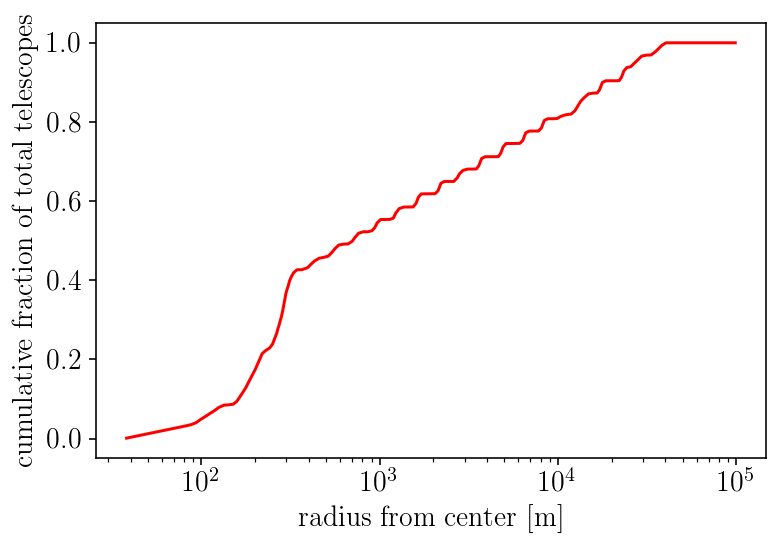

In [30]:
plt.subplots()
plt.plot(data_raw[:,0], data_raw[:,1], 'r')
#plt.plot(bins_radius, hist_radius, 'k.')

plt.xscale('log')
#plt.xlim(1e2, 1e5)
plt.xlabel('radius from center [m]')
plt.ylabel('cumulative fraction of total telescopes')

Text(0.5, 0, 'station index')

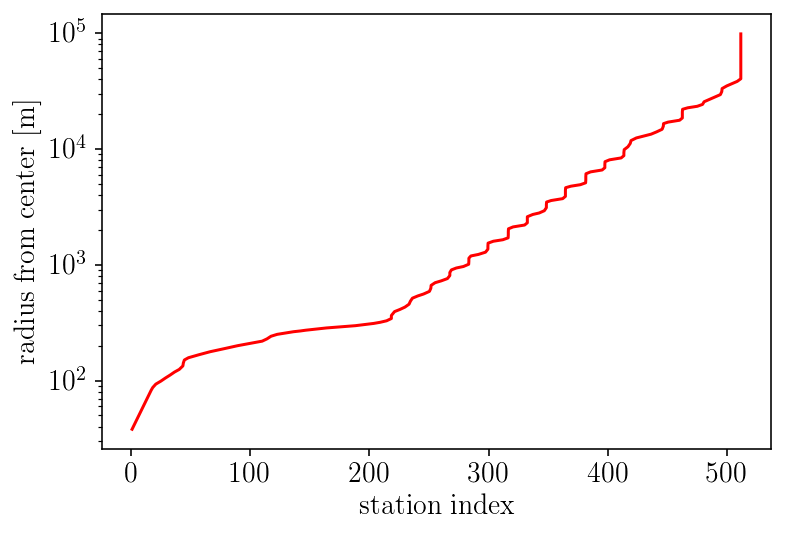

In [31]:
plt.subplots()
plt.plot(data_raw[:,1]*ct._SKALow_number_of_stations_, data_raw[:,0], 'r')
#plt.plot(hist_radius, bins_radius, 'k.')

plt.yscale('log')
#plt.ylim(1e2, 1e5)
plt.ylabel('radius from center [m]')
plt.xlabel('station index')

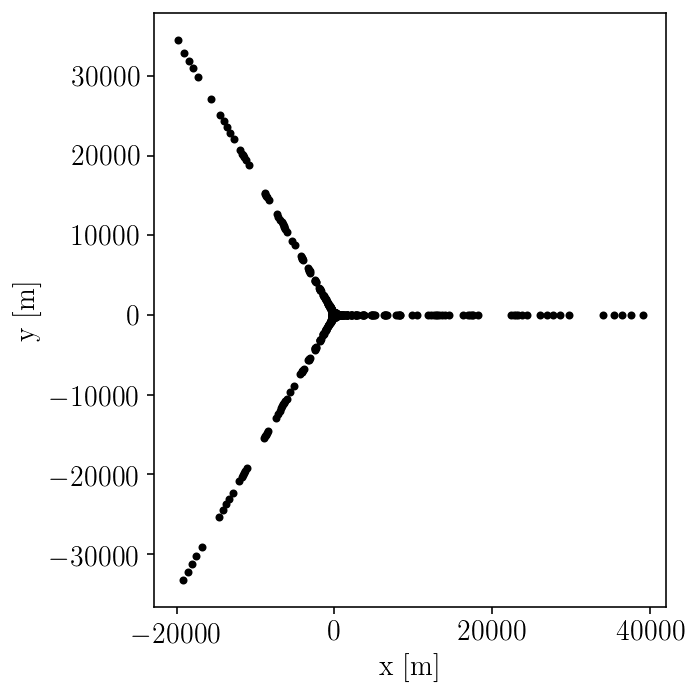

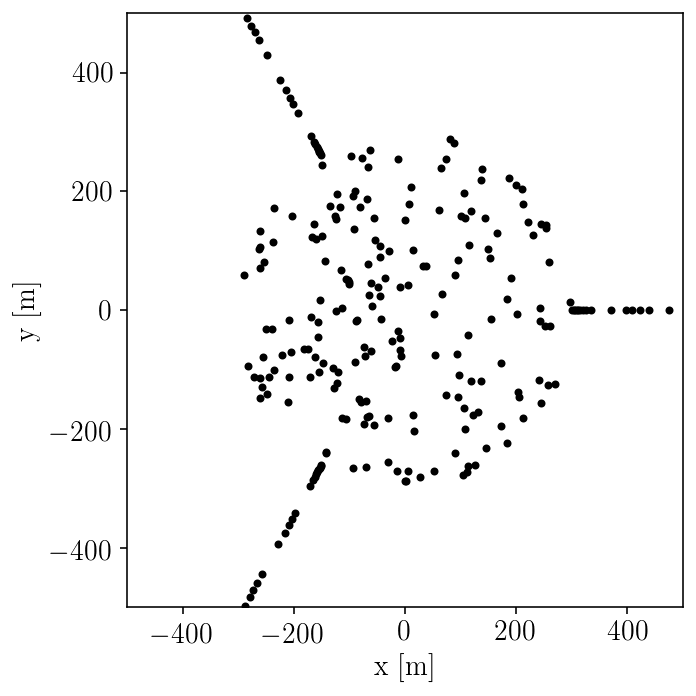

In [32]:
_, ax =  plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
#ax.set_aspect(0.8)

plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.tight_layout()
#ax.set_aspect(1)

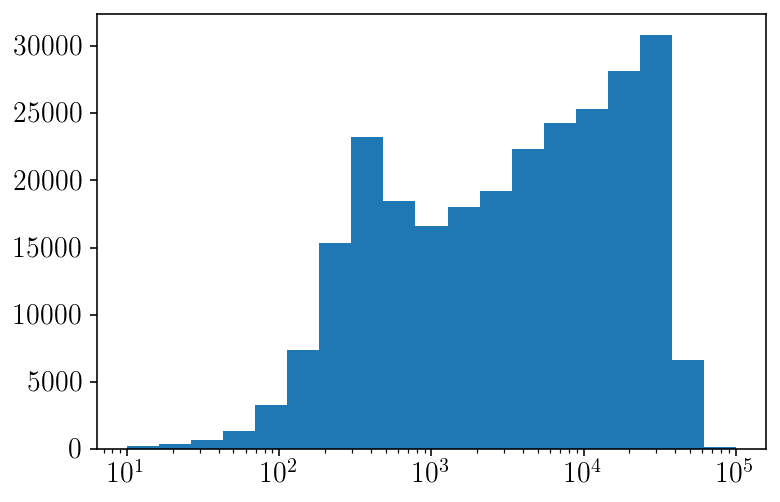

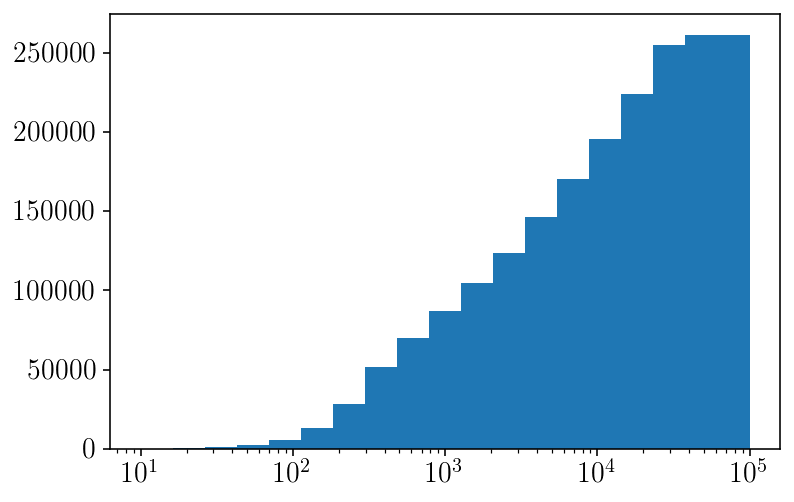

In [33]:
plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline)
plt.xscale('log')

plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline_cumsum)
plt.xscale('log')

SKA mid

In [34]:
(data_raw, x_arr, y_arr, bins_radius, hist_radius) = sk.SKA_conf['mid radius']
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']

Text(0, 0.5, 'cumulative fraction of total telescopes')

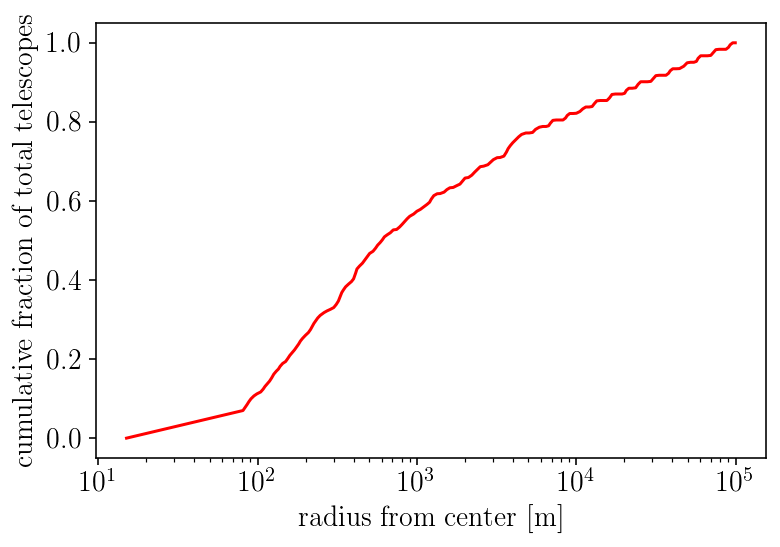

In [35]:
plt.subplots()
plt.plot(data_raw[:,0], data_raw[:,1], 'r')
#plt.plot(bins_radius, hist_radius, 'k.')

plt.xscale('log')
#plt.xlim(0.1, 1e5)
plt.xlabel('radius from center [m]')
plt.ylabel('cumulative fraction of total telescopes')

Text(0.5, 0, 'dish index')

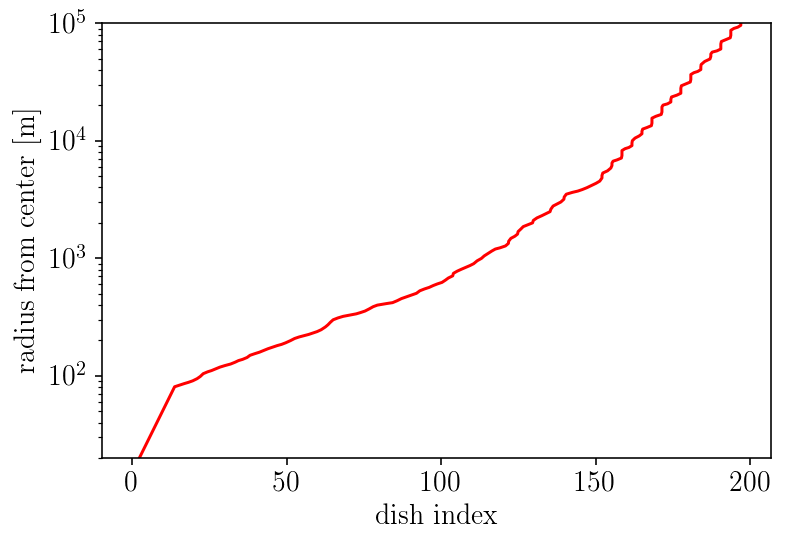

In [36]:
plt.subplots()
plt.plot(data_raw[:,1]*ct._SKA1Mid_number_of_dishes_, data_raw[:,0], 'r')
#plt.plot(hist_radius, bins_radius, 'k.')

plt.yscale('log')
plt.ylim(20, 1e5)
plt.ylabel('radius from center [m]')
plt.xlabel('dish index')

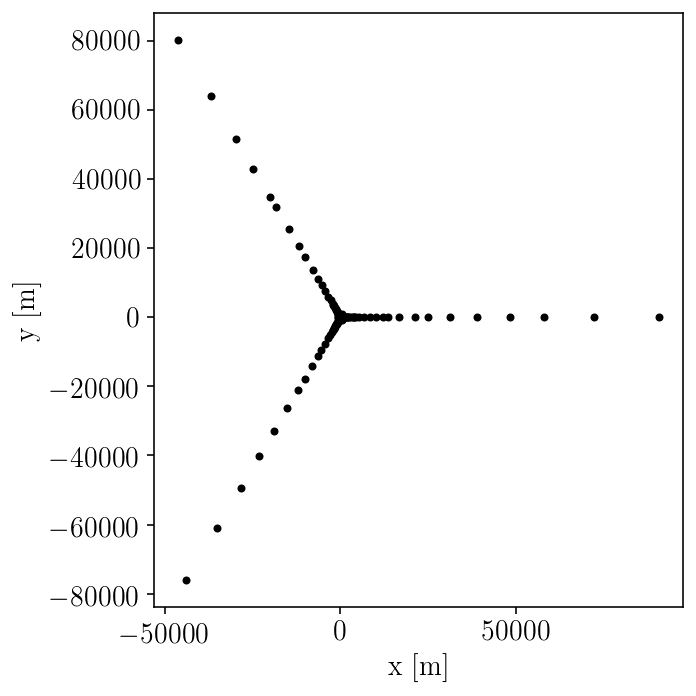

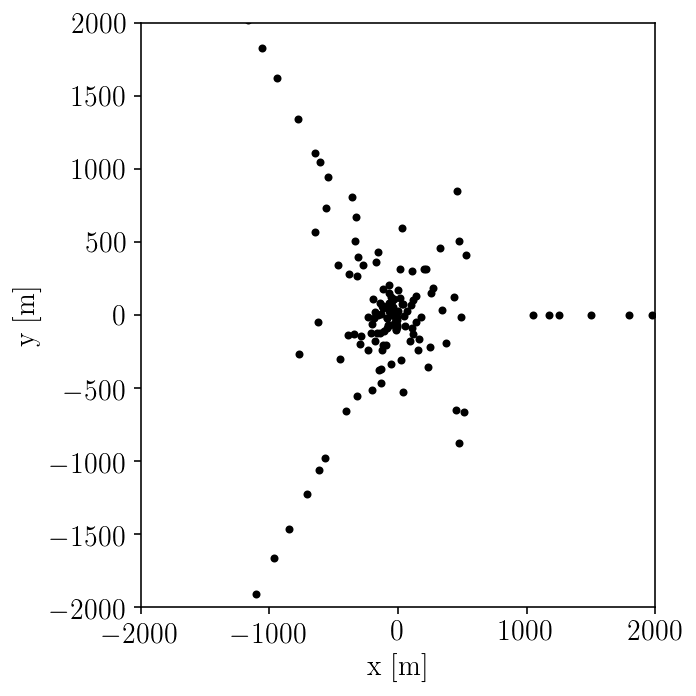

In [37]:
_, ax =  plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
#ax.set_aspect(0.8)

plt.subplots(figsize=(5,5))
plt.plot(x_arr, y_arr, 'k.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-ct._SKA1Mid_r_core_*2, ct._SKA1Mid_r_core_*2)
plt.ylim(-ct._SKA1Mid_r_core_*2, ct._SKA1Mid_r_core_*2)
plt.tight_layout()
#ax.set_aspect(1)

Text(0.5, 0, 'B smaller than [m]')

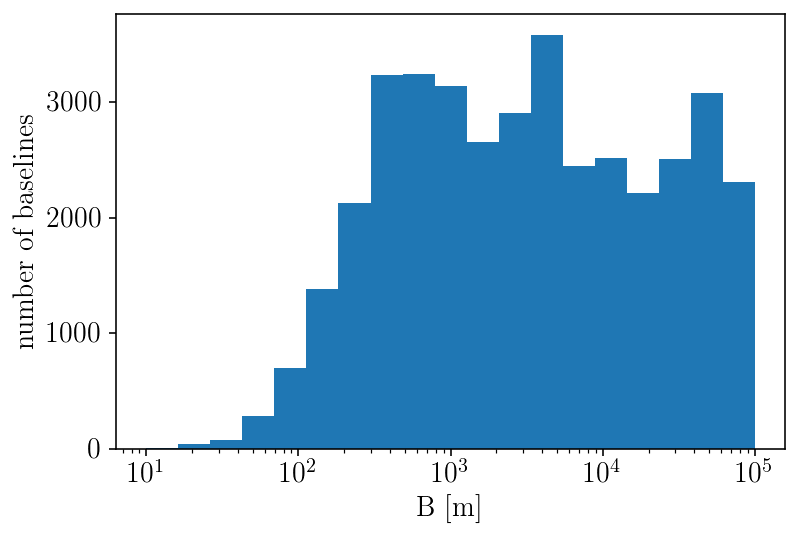

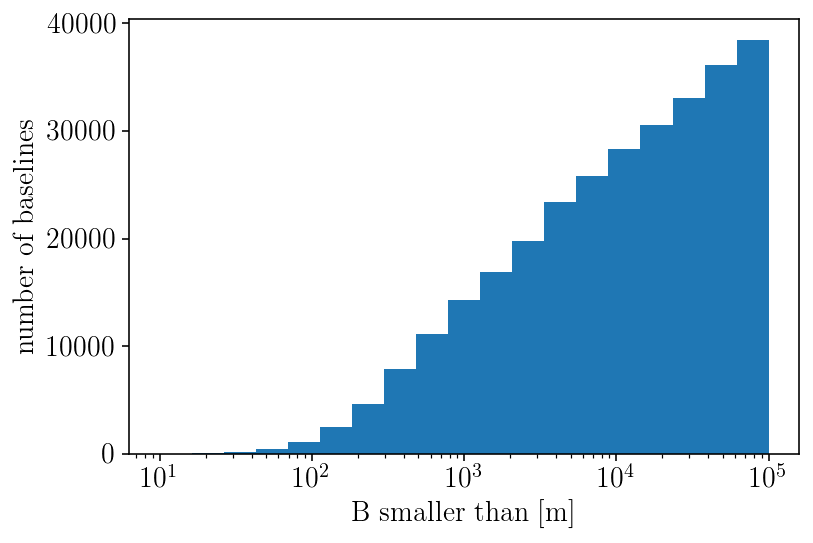

In [38]:
plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline)
plt.xscale('log')
plt.ylabel('number of baselines')
plt.xlabel('B [m]')

plt.subplots()
plt.hist(bins_baseline[:-1], bins=bins_baseline, weights=hist_baseline_cumsum)
plt.xscale('log')
plt.ylabel('number of baselines')
plt.xlabel('B smaller than [m]')


Text(0.5, 0, 'B smaller than [m]')

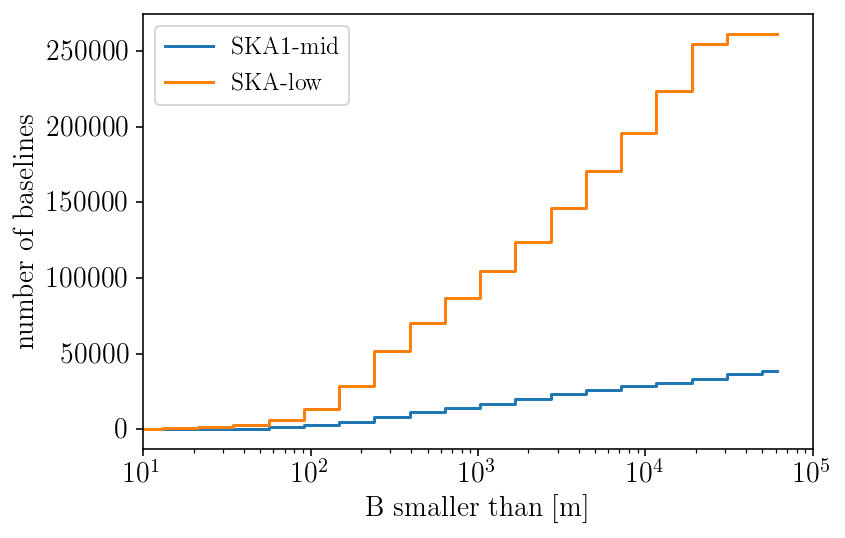

In [39]:
# binned version
plt.subplots()

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']
plt.step(bins_baseline[:-1], hist_baseline_cumsum, where='mid', label='SKA1-mid')
(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']
plt.step(bins_baseline[:-1], hist_baseline_cumsum, where='mid', label='SKA-low')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc='best')
plt.ylabel('number of baselines')
plt.xlabel('B smaller than [m]')
#plt.savefig('../plots/SKA_baseline_configuration.pdf')

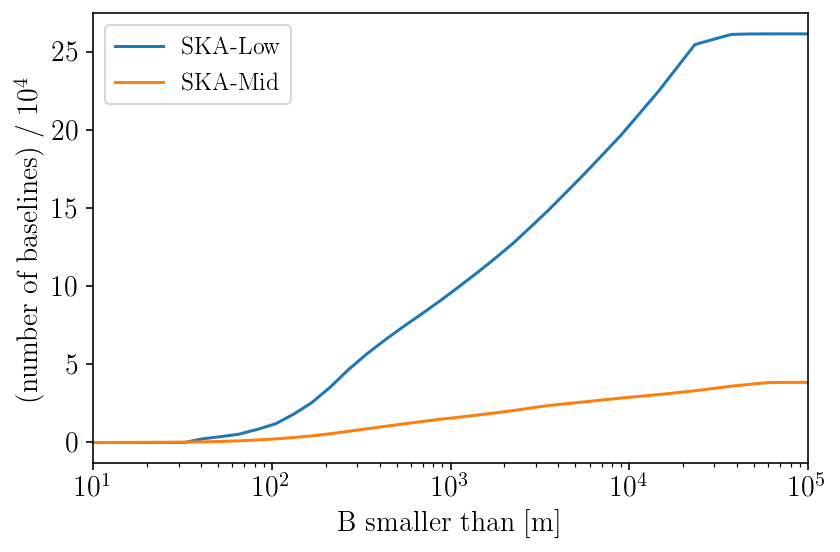

In [40]:
# unbinned version
plt.subplots()

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['low baseline']
r = np.logspace(1, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA low')
plt.plot(r, active_baseline_arr/1e4, label='SKA-Low')

(baseline_arr, hist_baseline, bins_baseline, hist_baseline_cumsum) = sk.SKA_conf['mid baseline']
r = np.logspace(1, 6)
active_baseline_arr = sk.SKA_get_active_baseline(r, exper_mode='SKA mid')
plt.plot(r, active_baseline_arr/1e4, label='SKA-Mid')

plt.xscale('log')
plt.xlim(1e1, 1e5)
plt.legend(loc=2)
plt.ylabel('(number of baselines) / $10^4$')
plt.xlabel('B smaller than [m]')
plt.tight_layout()
#plt.savefig('../plots/SKA_baseline_configuration.pdf')

In [41]:
# single point testing 
print(sk.SKA_specs(0.05, exper_mode="SKA low", correlation_mode="interferometry", theta_sig=50))
print(ct._SKALow_total_baselines_ == 512*511/2)

(580667.0, 1.0, 40.0, 0.3818681944649303, 0.05527436324391732, 512.0, array(1.e-100))
True


In [42]:
# test the number of baselines changing 
# as a function of frequency
for nu in np.logspace(-2, 15,200):
    (area, 
     window, 
     Tr,
     eta,
     Omega_res, 
     number_of_dishes, 
     number_of_measurements) = sk.SKA_specs(nu, 
                                            exper_mode="SKA low", 
                                            correlation_mode="interferometry", 
                                            theta_sig=45*ct._arcmin_over_radian_)
    print(number_of_measurements)

137717.89142926384
128666.58740916333
120215.95778125474
112434.7417008528
104657.63693741706
97357.67462585926
90057.71231430149
83063.34166456707
76324.97734295904
69527.19820183997
62043.82382998068
54560.44945812139
45887.51526145742
36471.01023633181
27534.380682007315
21296.74751617816
15059.114350349028
11053.004454881295
8065.660233775776
5447.209638879616
4120.312653954989
2793.415669030368
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e-100
1e

Visibility function scaling

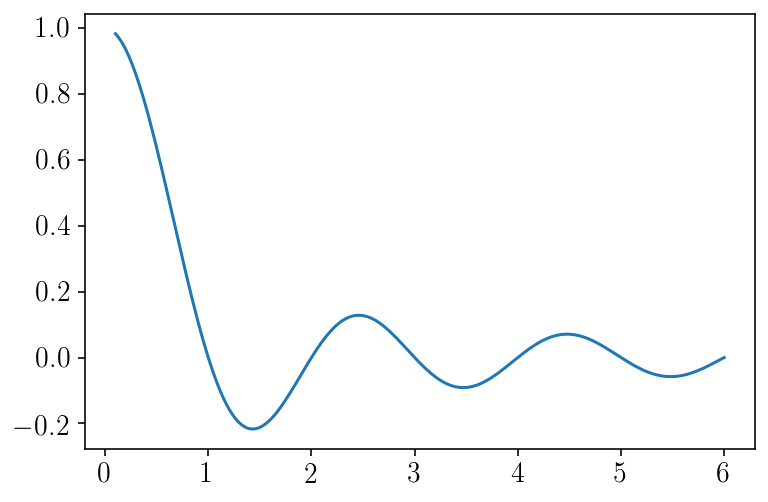

In [43]:
x_arr = np.linspace(0.1, 6, 200)
fn = lambda x: np.sin(np.pi*x)/(np.pi*x)
fn3 = lambda x: np.sin(np.pi*x)
fn2 = lambda x: fn(x) - 0.3
plt.subplots()
plt.plot(x_arr, fn(x_arr))
#plt.plot(x_arr, fn3(x_arr))

In [44]:
from scipy.optimize import root_scalar
root_scalar(fn2, bracket=[0.1,1], method="bisect")

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.7500785142090535

### Efficiency

In [3]:
Nsteps = 2001

nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nsteps//2)[1:]
# ... and SKA mid...
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nsteps - Nsteps//2)[1:]
# ... concatenating...
nu_arr = np.concatenate((nulow, numid))

In [4]:
help(sk.eta_nu)

Help on function eta_nu in module ska:

eta_nu(nu, exper_mode)
    Returns the efficiency eta.
    
    nu : frequency [GHz]
    exper_mode : mode in which the experiment is working



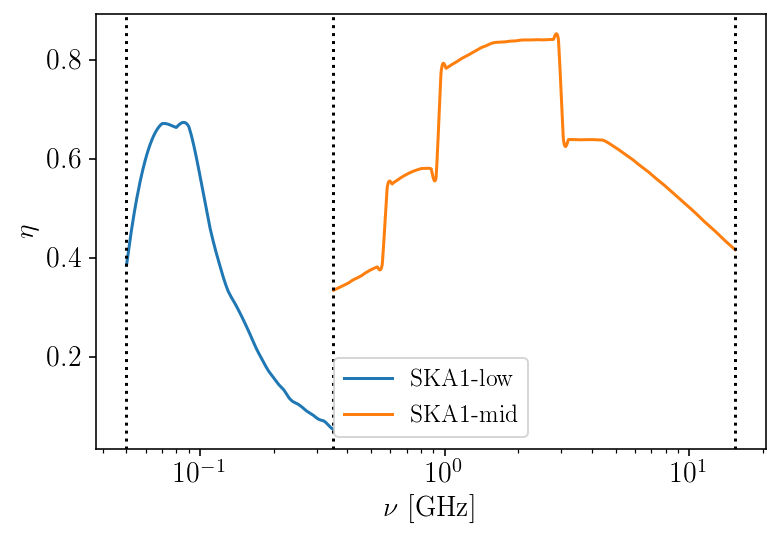

In [7]:
plt.plot(nulow, sk.eta_nu(nulow, "SKA low"), label="SKA1-low")
plt.plot(numid, sk.eta_nu(numid, "SKA mid"), label="SKA1-mid")
plt.xscale("log");
plt.xlabel(r"$\nu \ [\mathrm{GHz}]$");plt.ylabel(r"$\eta$")
plt.axvline(ct._nu_min_ska_low_, ls=":", color="k")
plt.axvline(ct._nu_min_ska_mid_, ls=":", color="k")
plt.axvline(ct._nu_max_ska_mid_, ls=":", color="k")
plt.legend();
plt.savefig("plots/eta_nu.pdf")

In [48]:
import astro as ap
help(ap.T_sys)

Help on function T_sys in module astro:

T_sys(nu, Tbg_at_408=27, beta=-2.75, Tr=None)
    The system temperature [K]. This function can be used for any experiments but if Tr is not specified, it will be automatically computed based on SKA.
    
    Parameters
    ----------
    nu: frequency [GHz]
    Tbg_at_408: the MW background at 408 MHz [K] (default: 27, for Cygnus A gegenschein position)
    beta: the index for the Milky (default: -2.75 from Braun et al. 2019)
    Tr: the receiver's noise brightness temperature (default: 0.)



In [49]:
import astro as ap
ap.T_sys([0.2, 0.25, 0.4, 1,2,3, 100])

array([237.5246705 , 149.56060079,  54.23661728,  28.01995325,
        26.06657252,  25.83733964,  25.72550726])

### Deriving the efficiency

the Bose distribution correction to temperature

In [4]:
def corr_fn(nu, T):
    x = 2.*np.pi * nu / T * ct._GHz_over_eV_ / ct._K_over_eV_
    res = x / (np.exp(x) - 1.)
    return res
    
corr_fn(10, 20)

# the atm opacity is also a small correction

0.9880498744786951

the sky temperature

In [5]:
Tsky = np.loadtxt('/home/chen/Downloads/background and efficiency/Tsky.csv', delimiter=',')

<IPython.core.display.Javascript object>


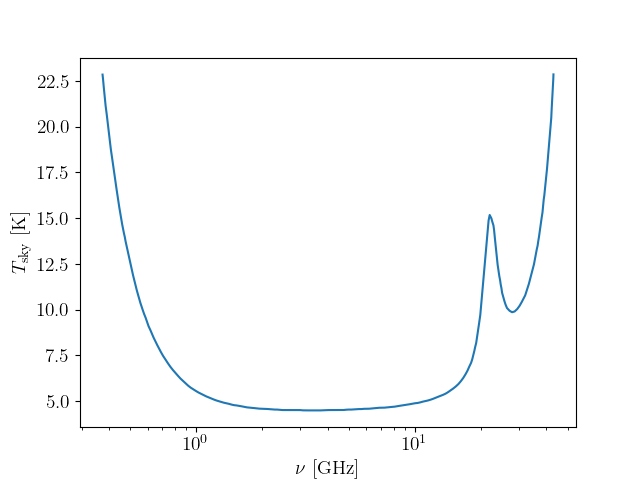

Text(0, 0.5, '$T_{\\rm sky}$ [K]')

In [6]:
plt.subplot()
plt.plot(Tsky[:,0], Tsky[:,1])
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sky}$ [K]')

Atm temperature

In [7]:
# JiJi proposes to use Braun and extrac their T_atm

Receiver temperature

<IPython.core.display.Javascript object>


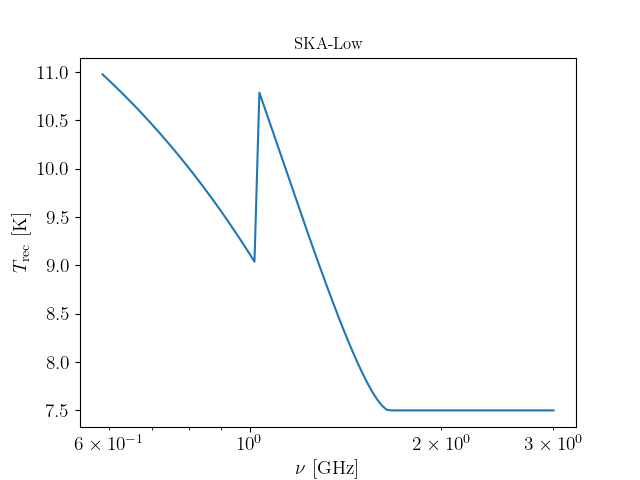

Text(0.5, 1.0, 'SKA-Low')

In [8]:
def Trec_mid_MeerKAT(nu):
    nu, is_scalar = tl.treat_as_arr(nu)
    res = []
    for nui in nu:
        if 0.58 < nui <1.02:
            res.append(11 - 4.5*(nui-0.58))
        elif 1.02 < nui < 1.67:
            res.append(7.5 + 6.8 * np.abs(nui - 1.65)**1.5)
        elif 1.65 < nui < 3.05:
            res.append(7.5)
        else:
            res.append(np.inf)
    if is_scalar:
        res = np.squeeze(res)
    return np.array(res)

nu_arr = np.logspace(np.log10(0.35), np.log10(12), 200)
plt.subplots()
plt.plot(nu_arr, Trec_mid_MeerKAT(nu_arr))
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA-Low')

<IPython.core.display.Javascript object>


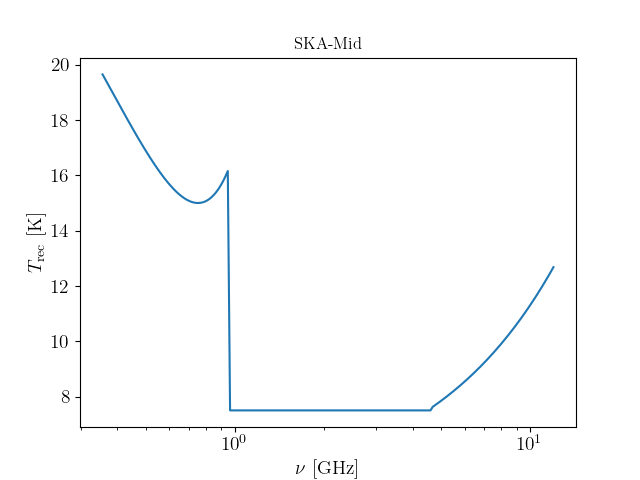

Text(0.5, 1.0, 'SKA-Mid')

In [33]:
def Trec_mid_SKA(nu):
    nu, is_scalar = tl.treat_as_arr(nu)
    res = []
    for nui in nu:
        if 0.35 < nui <0.95:
            res.append(15 + 30*(nui-0.75)**2)
        elif 0.95 < nui < 4.6:
            res.append(7.5)
        elif 4.6 < nui < 50:
            res.append(4.4+0.69 * nui)
        else:
            res.append(np.inf)
    if is_scalar:
        res = np.squeeze(res)
    return np.array(res)

nu_arr = np.logspace(np.log10(0.35), np.log10(12), 200)
plt.subplots()
plt.plot(nu_arr, Trec_mid_SKA(nu_arr))
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA-Mid')

<IPython.core.display.Javascript object>


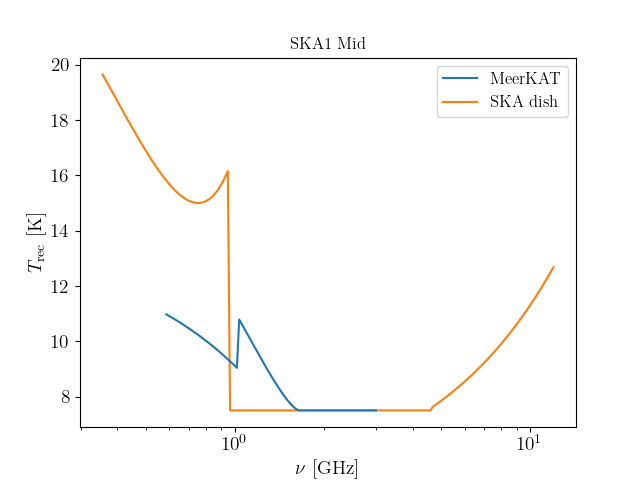

In [34]:
plt.subplots()
plt.plot(nu_arr, Trec_mid_MeerKAT(nu_arr), label='MeerKAT', zorder=3)
plt.plot(nu_arr, Trec_mid_SKA(nu_arr), label='SKA dish')
plt.xscale('log')
plt.ylabel(r'$T_{\rm rec}$ [K]')
plt.xlabel(r'$\nu$ [GHz]')
plt.title('SKA1 Mid')
plt.legend(loc=1)

verify with de Lera Acedo et al. 2017

<IPython.core.display.Javascript object>


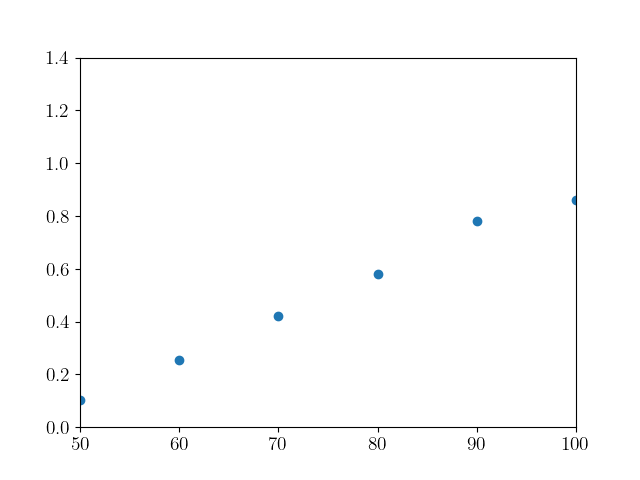

<IPython.core.display.Javascript object>


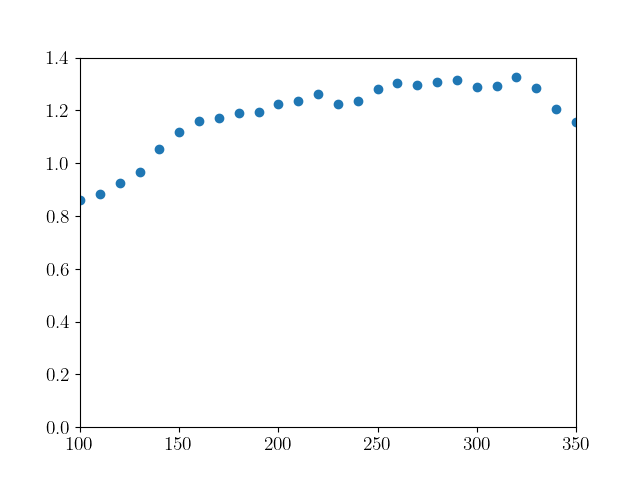

(0.0, 1.4)

In [35]:
A_over_T = sk.SKA_conf['A/T']
x = A_over_T[:, 0]
y = A_over_T[:, 1]
plt.subplots()
plt.plot(x*1000, y, 'o')
plt.xlim(50, 100)
plt.ylim(0, 1.4)

plt.subplots()
plt.plot(x*1000, y, 'o')
plt.xlim(100, 350)
plt.ylim(0, 1.4)

In [36]:
def T_sys_mid(nu):
    nu, is_scalar = tl.treat_as_arr(nu)
    Tsky_arr = np.interp(nu, Tsky[:,0], Tsky[:,1])
    # combine MeerKAT with SKA dishes
    # if there's only SKA dish, use SKA dish
    # if there are both, use geometric mean
    # prepare Trec_mid_MeerKAT
    Trec_arr = []
    for nui in nu:
        val1 = Trec_mid_MeerKAT(nui)
        val2 = Trec_mid_SKA(nui)
        if np.isinf(val1):
            val1 = val2
        val = np.sqrt(val1*val2)
        Trec_arr.append(val)
    Trec_arr = np.array(Trec_arr)
    res = ct._T_spill_mid_ + Tsky_arr + Trec_arr
    return res

In [37]:
Tsys_arr = T_sys_mid(nu_arr)

<IPython.core.display.Javascript object>


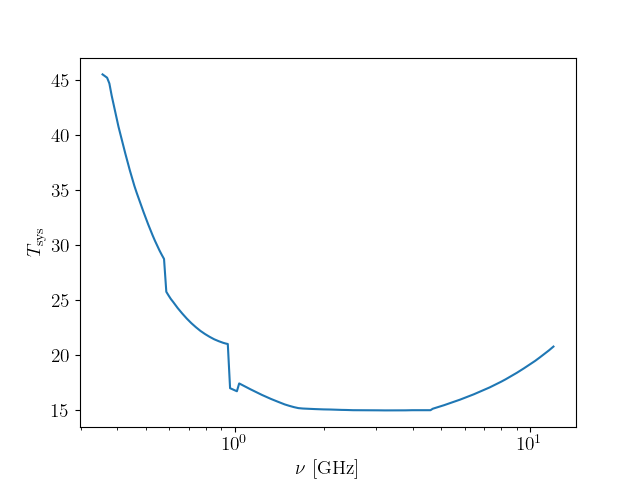

Text(0, 0.5, '$T_{\\rm sys}$')

In [38]:
plt.subplots()
plt.plot(nu_arr, Tsys_arr)
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$T_{\rm sys}$')

In [39]:
#ct._area_ska_mid_

extracting eta

In [40]:
Aeff_over_Tsys = sk.SKA_conf['A/T'][:,:-1]

In [17]:
3.14*(13.5/2)**2

143.06625

In [29]:
3.14*(15/2.)**2

176.625

In [19]:
3.14*(14.53/2)**2

165.7299065

In [20]:
(156/211)

0.7393364928909952

<IPython.core.display.Javascript object>


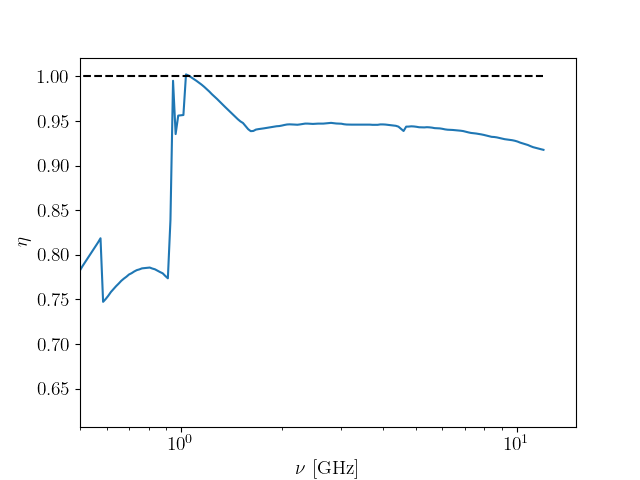

Text(0, 0.5, '$\\eta$')

In [41]:
plt.subplots()
Aeff_over_Tsys_arr = np.interp(nu_arr, Aeff_over_Tsys[:, 0], Aeff_over_Tsys[:, 1])
#plt.plot(Aeff_over_Tsys[:, 0], Aeff_over_Tsys[:, 1])
area_single_dish = ct._area_ska_mid_ / (ct._SKA1Mid_number_of_dishes_)
plt.plot(nu_arr, Aeff_over_Tsys_arr * Tsys_arr / area_single_dish) 
plt.plot(nu_arr, [1]*len(nu_arr), 'k--')
plt.xlim(0.5, 15)
plt.xscale('log')
plt.xlabel(r'$\nu$ [GHz]')
plt.ylabel(r'$\eta$')

In [42]:
np.interp(1, nu_arr, Aeff_over_Tsys_arr * Tsys_arr)

158.57165565193202